https://github.com/mini-pw/2021Z-DataVisualizationTechniques/blob/master/homeworks/homework_2/sawicki_bartosz/Sawicki_Bartosz_pd2.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as md

Postanowiłem poprawić wykres Bartka Sawickiego (https://github.com/mini-pw/2021Z-DataVisualizationTechniques/blob/master/homeworks/homework_2/sawicki_bartosz/Sawicki_Bartosz_pd2.pdf)

## Oryginalny Wykres

!['Wykres znaleziony na tvn24'](https://raw.githubusercontent.com/mini-pw/2021Z-DataVisualizationTechniques/master/homeworks/homework_2/sawicki_bartosz/tvn_plot.jpg)

## Pierwsze poprawienie

![PD2 - B.Sawicki](first_plot.png)

## Moje poprawienie obu

### Kod i wykres

In [2]:
data = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")
data = data[data["countriesAndTerritories"] == 'Poland']
data = data[["dateRep", "cases", "deaths"]]
begin, end = (pd.to_datetime('2020-03-01'), pd.to_datetime('2020-12-01'))

In [3]:
data[['dateRep']] = pd.to_datetime(data['dateRep'], format = '%d/%m/%Y')

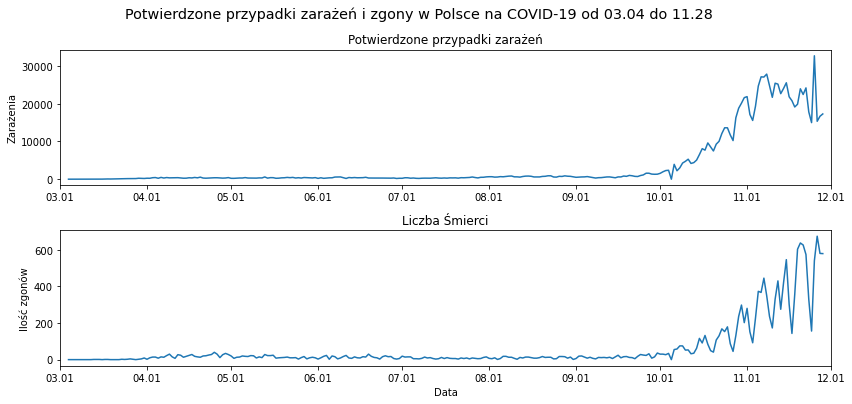

In [4]:
fig, axs = plt.subplots(nrows=2, figsize = (12,6))
sns.lineplot(x='dateRep', y='cases', data=data, ax=axs[0])
sns.lineplot(x='dateRep', y='deaths', data=data, ax=axs[1])
fig.tight_layout(pad=2.0)
st = fig.suptitle("Potwierdzone przypadki zarażeń i zgony w Polsce na COVID-19 od 03.04 do 11.28", fontsize="x-large")

axs[0].set_xlim(begin, end)
axs[0].set_title("Potwierdzone przypadki zarażeń")
axs[0].set_ylabel("Zarażenia")
axs[0].set_xlabel("")
axs[0].xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
axs[0].xaxis.set_major_formatter(md.DateFormatter('%m.%d'))

axs[1].set_xlim(begin, end)
axs[1].set_title("Liczba Śmierci")
axs[1].set_ylabel("Ilość zgonów")
axs[1].set_xlabel("Data")
axs[1].xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
axs[1].xaxis.set_major_formatter(md.DateFormatter('%m.%d'))

st.set_y(0.95)
fig.subplots_adjust(top=0.85)
plt.show()

### Uzasadnienie

Zmniejszona została liczba podpisów na osi x, co zwiększa klarowność poprzez zaznaczanie tylko pierwszych dni miesięcy, zamiast niepotrzebnego cotygodniowego zaznaczenia. Nie trzeba również przekręcać głowy by się łatwiej czytało. Rozdzielone zostały wykresy, ponieważ nie ma potrzeby jakiegokolwiek porównywania wartości by były na jednym, a ułożenie pionowe i współdzielenie osi x pozwala na łatwe zauważanie korelacji między zarażeniami a zgonami. Dodatkowo zamieszanie w pracy Bartosza wprowadzały dwie różne skale osi y na jednym wykresie oraz w jednym przypadku naniesienie lini dla danych wartości (2000 i 4000), dla drugiej skali wartości "wiszą w powietrzu". Ponieważ mamy prawie 300 dni na skali y, zmieniłem postać wykresu zarażeń na liniową. 